# Unit 5 - Financial Planning


In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [23]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [24]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [25]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [26]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [27]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# Set the identifer for current BTC
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# Set the identifer for currect ETH
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
#print BTC and ETH price
btc_price, eth_price

(11693.08, 427.05)

In [28]:
# Compute current value of my crpto for BTC and ETH
my_btc_value = (my_btc)*(btc_price)
my_eth_value = (my_eth)*(eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14031.70
The current value of your 5.3 ETH is $2263.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Current amount of Shares
my_agg = 200
my_spy = 50

# Set current amount of shares data
shares_data = {"shares": [200, 50]}

#Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [30]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [31]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [32]:
# Format current date as ISO format. I used my birthday date since it was this month. 
today = pd.Timestamp("2020-08-27", tz="America/New_York").isoformat()

In [33]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [34]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, start=today, end=today).df

#Display SPY and AGG dataframe
df_portfolio

AGG                                       SPY  \
                             open    high     low   close    volume    open   
2020-08-27 00:00:00-04:00  118.55  118.56  117.95  117.97  10931474  348.51   

                                                             
                            high     low   close     volume  
2020-08-27 00:00:00-04:00  349.9  346.53  348.29  103934256

In [35]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].values[0]
spy_close_price = df_portfolio["SPY"]["close"].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $348.29


In [36]:
# Compute the current value of shares
my_agg_value = (my_agg)*(agg_close_price)
my_spy_value = (my_spy)*(spy_close_price)

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23594.00
The current value of your 50 SPY shares is $17414.50


### Savings Health Analysis

In [37]:
# Create savings DataFrame
df_savings = pd.DataFrame(data={'amount':[(my_btc_value + my_eth_value ),(my_agg_value + my_spy_value )]},
                         index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,16295.061
shares,41008.500


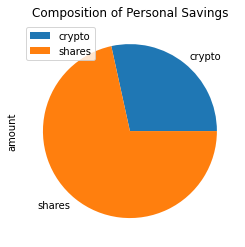

In [38]:
# Plot savings pie chart
df_savings.plot(kind='pie',y='amount',title='Composition of Personal Savings')


In [39]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (my_btc_value + my_eth_value ) + (my_agg_value + my_spy_value )
insufficient = round(total_savings - emergency_fund,2)
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have plently of money in your emergency funds!")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goals!")
else:
    print(f"You are {insufficient} away from reaching your goal")

Congratulations! You have plently of money in your emergency funds!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [40]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-27', tz='America/New_York').isoformat()

In [41]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers,timeframe,start=start_date,end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665.0   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866.0   
2015-08-31 00:00:00-04:00  109.28  109.370  108.90  108.920  3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.110  108.77  109.010  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.050  108.81  108.900  3273302.0   

                              SPY                                      
                             open     high     low   close     volume  
2015-08-27 00:00:00-04:00  197.02  199.410  195.21  199.28  226847229  
2015-08-28 00:00:00-04:00  198.50  199.835  197.92  199.28  111959716  
2015-08-31 00:00:00-04:00  198.11  199.125  197.01  197.60  108023599  
2015-09-01 00:00:00-04:00  193.12  194.770  190.73  191.61  173963880  
2015-09-02 00:00:00-04:00  194.65  195.460  192.42  195.46  120044919

In [42]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [43]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665.0   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866.0   
2015-08-31 00:00:00-04:00  109.28  109.370  108.90  108.920  3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.110  108.77  109.010  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.050  108.81  108.900  3273302.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-27 00:00:00-04:00          NaN  197.02  199.410  195.21  199.28   
2015-08-28 00:00:00-04:00    -0.000907  198.50  199.835  197.92  199.28   
2015-08-31 00:00:00-04:00    -0.000743  198.11  199.125  197.01  197.60   
2015-09-01 00:00:00-04:00     0.000826  193.12  194.770  190.73  191.61   
2015-09-02 00:00:00-04:00    -0.001009  194.65  195.460  192.42  195.46   

                                                   
                              volume daily_return  
2015-08-27 00:00:00-04:00  226847229          NaN  
2015-08-28 00:00:00-04:00  111959716     0.000000  
2015-08-31 00:00:00-04:00  108023599    -0.008430  
2015-09-01 00:00:00-04:00  173963880    -0.030314  
2015-09-02 00:00:00-04:00  120044919     0.020093

In [44]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996373,0.996451,0.995171,1.002506,1.004053,1.006511,1.001827,0.989508,0.996386,1.000894,...,0.991808,0.999855,0.994310,1.004597,1.000353,0.996697,1.004462,0.995345,1.003978,1.004169
2,0.995808,1.003509,0.992069,1.003920,1.003152,1.007330,1.002161,0.989059,0.995937,1.004721,...,0.983737,0.994024,0.992353,1.002521,1.003805,0.985812,1.004960,0.999064,1.012932,1.004618
3,0.996291,1.006828,0.994464,1.000208,1.002106,1.001359,0.992950,0.992963,0.998002,1.015294,...,0.977383,0.987778,0.996802,1.000975,1.002929,0.986411,1.009823,0.988953,1.018108,1.000161
4,0.997789,1.003974,0.995736,0.994347,1.004390,1.004885,0.990178,0.992863,0.996815,1.014963,...,0.974954,0.983481,0.997588,1.000124,0.997098,0.984551,1.012457,0.987406,1.012994,0.997234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.004209,5.934046,14.379705,16.096843,4.719422,3.256065,2.768647,3.476584,5.030423,8.161574,...,6.324759,6.754278,10.136097,4.863623,5.044778,6.076080,9.497821,3.379993,8.653298,2.827431
7557,8.007783,5.957332,14.327793,16.089461,4.738774,3.234679,2.768040,3.470551,5.055705,8.149410,...,6.327303,6.798130,10.096304,4.880947,4.995716,6.048078,9.517351,3.367888,8.609500,2.823942
7558,7.999306,5.908528,14.396137,16.218385,4.730304,3.244755,2.756240,3.451354,5.060458,8.163333,...,6.320040,6.806500,10.080766,4.882301,4.974834,6.010373,9.554916,3.369042,8.612041,2.829177
7559,7.949540,5.884493,14.347054,16.271474,4.776565,3.241213,2.770823,3.468739,5.070843,8.057011,...,6.382979,6.761669,10.103314,4.898128,5.000663,6.110393,9.573418,3.381688,8.680084,2.816551


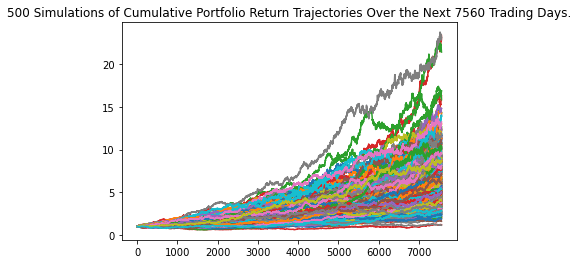

In [45]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

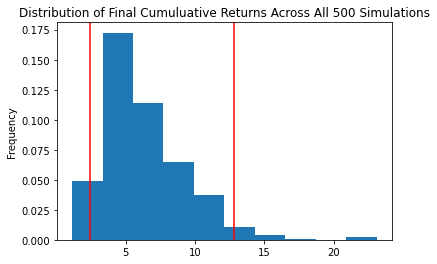

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.332426
std               3.009797
min               1.158039
25%               4.224578
50%               5.627203
75%               7.835786
max              23.078676
95% CI Lower      2.419566
95% CI Upper     12.829839
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [48]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * round(tbl[8],2)
ci_upper = initial_investment * round(tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48400.0 and $256600.0


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [49]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * round(tbl[8],2)
ci_upper = initial_investment * round(tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72600.0 and $384900.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
    


In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996013,1.004607,0.997932,0.998774,0.995107,1.003236,0.994888,0.997010,0.999763,0.997092,...,1.001783,1.006115,0.994942,1.003852,0.991611,1.000916,0.998136,1.002093,0.993548,1.000066
2,0.988452,0.996020,1.002684,0.989848,0.992796,0.990198,0.997248,0.992827,1.006194,1.001323,...,0.994768,1.004076,0.991119,1.009169,0.992060,0.991678,0.994253,1.006975,0.980014,0.999516
3,0.987006,0.991915,1.008326,0.993202,0.994196,0.987277,0.995471,0.989711,1.008330,1.004234,...,0.991004,1.007448,0.982787,1.014247,0.983288,0.994793,1.000212,1.002288,0.982584,0.998852
4,0.987368,0.991708,0.998415,0.988388,0.996702,0.980473,0.995189,0.989340,1.014772,0.996403,...,0.993339,1.008943,0.979803,1.012504,0.981176,1.004077,1.009246,1.008009,0.985095,0.998612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.581712,1.640324,1.655433,1.539524,1.126013,1.868198,1.458743,1.296516,1.647829,1.315245,...,1.160134,1.185930,0.938947,1.519999,1.029967,0.998832,1.443553,1.212470,1.091491,1.202653
1257,1.586320,1.631852,1.655746,1.530603,1.123788,1.834108,1.475220,1.287753,1.658874,1.313412,...,1.164484,1.185403,0.941214,1.520057,1.032248,1.012531,1.437364,1.214245,1.094129,1.204417
1258,1.581934,1.639480,1.662055,1.531670,1.118711,1.853417,1.472254,1.280370,1.659172,1.310720,...,1.157096,1.182361,0.939135,1.541323,1.018942,1.020491,1.437318,1.216213,1.095460,1.205956
1259,1.587768,1.648517,1.676021,1.537594,1.123070,1.841162,1.467924,1.282897,1.672668,1.308021,...,1.157997,1.178683,0.938772,1.543506,1.020529,1.024407,1.431672,1.217578,1.096900,1.207013


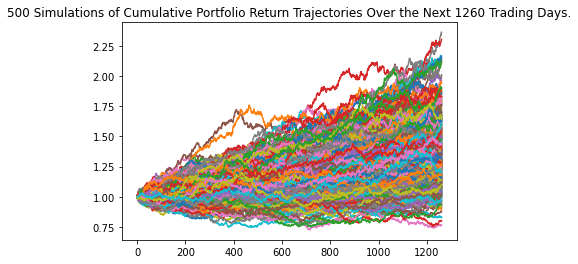

In [52]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

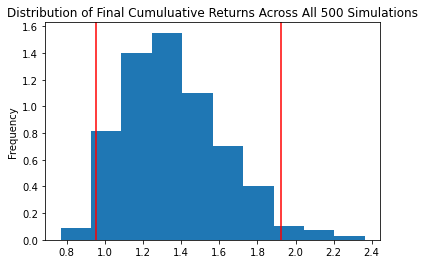

In [53]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.360992
std               0.263452
min               0.766901
25%               1.167370
50%               1.336507
75%               1.523075
max               2.364055
95% CI Lower      0.953789
95% CI Upper      1.924769
Name: 1260, dtype: float64


In [55]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment_five * round(tbl[8],2)
ci_upper_five = initial_investment_five * round(tbl[9],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $48400.0 and $256600.0


### Ten Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [57]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001417,0.994566,1.004563,1.000627,1.002264,1.004486,1.003268,1.001398,1.000380,0.989688,...,0.997452,1.003492,1.002241,1.010980,1.003867,1.005746,0.995256,1.005842,0.999491,0.999787
2,1.000054,0.990316,1.013674,0.994789,0.999732,1.007395,0.993080,1.004149,1.007193,0.999101,...,0.998940,1.002698,1.000253,1.008466,1.010783,1.003894,0.988707,1.009488,1.003787,0.992560
3,1.000829,0.981221,1.003272,0.990131,0.995337,1.007567,0.992030,1.003473,1.002695,0.987777,...,1.007338,1.003459,0.991284,1.012805,1.013359,1.001134,0.989353,1.011855,1.008865,1.002320
4,1.001976,0.977610,1.011245,0.990693,0.998991,1.019392,0.989528,1.004463,0.998719,0.984981,...,1.016386,1.003913,0.986808,1.008988,1.008182,0.996164,0.997566,1.015984,1.005986,0.999473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.435948,1.898377,1.480459,2.575724,2.011817,1.641685,1.677239,1.568660,1.018871,1.028680,...,2.556740,2.209347,1.445384,2.339847,2.028613,1.622237,1.645138,1.657690,1.237348,1.639819
2517,1.442448,1.917028,1.472612,2.562758,2.018396,1.668482,1.683775,1.559717,1.014343,1.034941,...,2.580410,2.208352,1.441711,2.328343,2.019115,1.608044,1.653115,1.669499,1.231874,1.637899
2518,1.426022,1.915800,1.467788,2.581811,2.027459,1.673096,1.664082,1.559319,1.014332,1.026997,...,2.587060,2.224029,1.437759,2.324275,2.019609,1.609040,1.653423,1.673049,1.225659,1.638604
2519,1.434747,1.939281,1.474156,2.587363,2.019419,1.684699,1.653204,1.568343,1.015836,1.029532,...,2.587889,2.225275,1.441563,2.324302,2.018169,1.616481,1.651308,1.678092,1.228615,1.637111


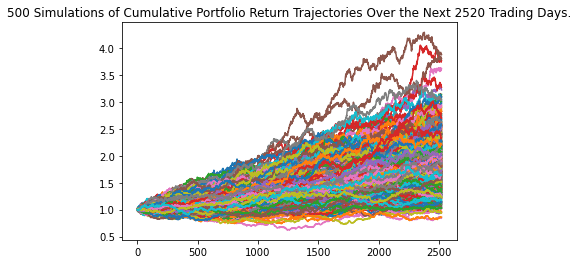

In [58]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

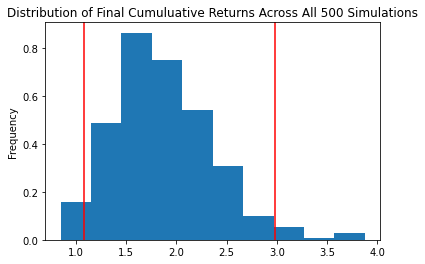

In [59]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.861743
std               0.487968
min               0.845991
25%               1.510810
50%               1.807776
75%               2.159714
max               3.876697
95% CI Lower      1.078585
95% CI Upper      2.980516
Name: 2520, dtype: float64


In [61]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment_ten * round(tbl[8],2)
ci_upper_ten = initial_investment_ten * round(tbl[9],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $48400.0 and $256600.0
